<a href="https://colab.research.google.com/github/bdgToji/VNP/blob/main/Zadaca2_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Симнете го податочното множество

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd
import numpy as np
import keras
from keras.layers import Input, Dense, LSTM, Embedding, concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/VNP/Combined_News_DJIA.csv')
df2 = pd.read_csv('/content/drive/MyDrive/VNP/upload_DJIA_table.csv')

In [4]:
df1

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [5]:
df2

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
...,...,...,...,...,...,...,...
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609


# Направете претпроцесирање на податоците

In [6]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [7]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [8]:
df = df2.merge(df1, left_on='Date', right_on='Date')

In [9]:
df

,Date,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,...,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,...,"Escape Tunnel, Dug by Hand, Is Found at Holoca...",The land under Beijing is sinking by as much a...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",...,"US, Canada and Mexico pledge 50% of power from...",There is increasing evidence that Australia is...,"Richard Branson, the founder of Virgin Group, ...","37,000-yr-old skull from Borneo reveals surpri...",Palestinians stone Western Wall worshipers; po...,Jean-Claude Juncker asks Farage: Why are you h...,"""Romanians for Remainians"" offering a new home...",Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,...,German lawyers to probe Erdogan over alleged w...,"Boris Johnson says the UK will continue to ""in...",Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,...,b'Bank analyst forecast Georgian crisis 2 days...,"b""Georgia confict could set back Russia's US r...",b'War in the Caucasus is as much the pr

In [10]:
df = df[df['Date']<'2015-12-31']

In [11]:
df.set_index('Date', inplace=True)

In [12]:
df.sort_index(inplace=True)

<ipython-input-12-937e54797a99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_index(inplace=True)


In [13]:
df

,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,Top3,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,...,b'Bank analyst forecast Georgian crisis 2 days...,"b""Georgia confict could set back Russia's US r...",b'War in the Caucasus is as much the product o...,"b'""Non-media"" photos of South Ossetia/Georgia ...",b'Georgian TV reporter shot by Russian sniper ...,b'Saudi Arabia: Mother moves to block child ma...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-23,17427.630859,17607.919922,17427.630859,17602.609375,92820000,17602.609375,1,New law in India would try teens as adults for...,Colombia legalizes medical marijuana,Anonymous

In [14]:
for i in range(11,26):
  df = df.drop(columns=[f'Top{i}'])

In [15]:
df

,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10
Date,,,,,,,,,,,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?'
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop..."
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar'
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...","b""92% of CNN readers: Russia's actions in Geor..."
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",b'Russia exaggerating South Ossetian death tol...,b' Musharraf expected to resign rather than fa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-23,17427.630859,17607.919922,17427.630859,17602.609375,92820000,17602.609375,1,New law in India would try teens as adults for...,Colombia legalizes medical marijuana,Anonymous has declared cyber-war on Turkey: ''...,"Research reveals five major banks, JP Morgan, ...",Terror attack foiled in French region of Orleans,New Zealand Judge rules Kim Dotcom can be extr...,German court ruling: you can force your ex lov...,The Pirate Bay Co-Founder Makes Kopimashin Mus...,Kenya: Muslim Women gave hijabs to Christians ...,More Than Exxon: Big Oil Companies for Years S...
2015-12-24,17593.259766,17606.339844,17543.949219,17552.169922,40350000,17552.169922,0,"Brazil declares emergency after 2,400 babies a...",Scientists find big 1500-yr-old Viking settlem...,Paris attacks: Belgian police arrest ninth sus...,Wiretapping reveals communication between Turk...,

In [16]:
df['Combined_news'] = df['Top1']
for i in range(2,11):
  df['Combined_news'] = df['Combined_news'] + df[f'Top{i}']

In [17]:
df

,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Combined_news
Date,,,,,,,,,,,,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',"b""Georgia 'downs two Russian warplanes' as cou..."
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Why wont America and Nato help us? If they w...
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',b'Remember that adorable 9-year-old who sang a...
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...","b""92% of CNN readers: Russia's actions in Geor...",b' U.S. refuses Israel weapons to attack Iran:...
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",b'Russia exaggerating South Ossetian death tol...,b' Musharraf expected to resign rather than fa...,b'All the experts admit that we should legalis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-23,17427.630859,17607.919922,17427.630859,17602.609375,92820000,17602.609375,1,New law in India would try teens as adults for...,Colombia legalizes medical marijuana,Anonymous has declared cyber-war on Turkey: ''...,"Research reveals five major banks, JP Morgan, ...",Terror attack foiled in French region of Orleans,New Zealand Judge rules Kim Dotcom can be extr...,German court ruling: you can force your ex lov...,The Pirate Bay Co-Founder Makes Kopimashin Mus...,Kenya: Muslim Women gave hijabs to Christians ...,More Than Exxon: Big Oil Companies for Years S...,New law in India 

# Prev 5 days for numerics and prev 1 day for Text

In [18]:
df1 = df

In [19]:
for i in range(1,11):
  df1 = df1.drop(columns=[f'Top{i}'])

In [20]:
df1

,Open,High,Low,Close,Volume,Adj Close,Label,Combined_news
Date,,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0,"b""Georgia 'downs two Russian warplanes' as cou..."
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1,b'Why wont America and Nato help us? If they w...
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0,b'Remember that adorable 9-year-old who sang a...
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0,b' U.S. refuses Israel weapons to attack Iran:...
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,1,b'All the experts admit that we should legalis...
...,...,...,...,...,...,...,...,...
2015-12-23,17427.630859,17607.919922,17427.630859,17602.609375,92820000,17602.609375,1,New law in India would try teens as adults for...
2015-12-24,17593.259766,17606.339844,17543.949219,17552.169922,40350000,17552.169922,0,"Brazil declares emergency after 2,400 babies a..."
2015-12-28,17535.660156,17536.900391,17437.339844,17528.269531,59770000,17528.269531,0,"Germany recruits 8,500 teachers to teach Germa..."


In [21]:
df1['News_yesterday'] = df1.Combined_news.shift()

In [22]:
df1

,Open,High,Low,Close,Volume,Adj Close,Label,Combined_news,News_yesterday
Date,,,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0,"b""Georgia 'downs two Russian warplanes' as cou...",None
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1,b'Why wont America and Nato help us? If they w...,"b""Georgia 'downs two Russian warplanes' as cou..."
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0,b'Remember that adorable 9-year-old who sang a...,b'Why wont America and Nato help us? If they w...
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0,b' U.S. refuses Israel weapons to attack Iran:...,b'Remember that adorable 9-year-old who sang a...
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,1,b'All the experts admit that we should legalis...,b' U.S. refuses Israel weapons to attack Iran:...
...,...,...,...,...,...,...,...,...,...
2015-12-23,17427.630859,17607.919922,17427.630859,17602.609375,92820000,17602.609375,1,New law in India would try teens as adults for...,SpaceXs Falcon 9 rocket successfully lands upr...
2015-12-24,17593.259766,17606.339844,17543.949219,17552.169922,40350000,17552.169922,0,"Brazil declares emergency after 2,400 babies a...",New law in India would try teens as adults for...
2015-12-28,17535.660156,17536.900391,17437.339844,17528.269531,59770000,17528.269531,0,"Germany recruits 8,500 teachers to teach Germa...","Brazil declares emergency after 2,400 babies a..."


In [23]:
numeric_feature_names = df1.columns[:-3]

In [24]:
numeric_feature_names

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [25]:
lags = 5

In [27]:
for i in range(1,lags+1):
  for col in numeric_feature_names:
    df1[f'{col}_prev_{i}'] = df1[col].shift(i)

In [28]:
df1

,Open,High,Low,Close,Volume,Adj Close,Label,Combined_news,News_yesterday,Open_prev_1,...,Low_prev_4,Close_prev_4,Volume_prev_4,Adj Close_prev_4,Open_prev_5,High_prev_5,Low_prev_5,Close_prev_5,Volume_prev_5,Adj Close_prev_5
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0,"b""Georgia 'downs two Russian warplanes' as cou...",None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1,b'Why wont America and Nato help us? If they w...,"b""Georgia 'downs two Russian warplanes' as cou...",11432.089844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0,b'Remember that adorable 9-year-old who sang a...,b'Why wont America and Nato help us? If they w...,11729.669922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0,b' U.S. refuses Israel weapons to attack Iran:...,b'Remember that adorable 9-year-old who sang a...,11781.700195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,1,b'All the experts admit that we should legalis...,b' U.S. refuses Israel weapons to attack Iran:...,11632.809570,...,11388.040039,11734.320312,212830000.0,11734.320312,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-23,17427.630859,17607.919922,17427.630859,17602.609375,92820000,17602.609375,1,New law in India would try teens as adults for...,SpaceXs Falcon 9 rocket successfully lands upr...,17253.550781,...,17493.500000,17495.839844,115780000.0,17495.839844,17530.849609,17784.359375,17483.679688,17749.089844,123790000.0,17749.089844
2015-12-24,17593.259766,17606.339844,17543.949219,17552.169922,40350000,17552.169922,0,"Brazil declares emergency after 2,400 babies a...",New law in India would try teens as adults for...,17427.630859,...,17124.310547,17128.550781,344560000.0,17128.550781,17756.539062,17796.759766,17493.500000,17495.839844,115780000.0,17495.839844
2015-12-28,17535.660156,17536.900391,17437.339844,17528.269531,59770000,17528.269531,0,"Germany recruits 8,500 teachers to teach Germa...","Brazil declares emergency after 2,400 babies a...",17593.259766,...,17116.730469,17251.619141,114910000.0,17251.619141,17495.039062,17496.580078,17124.310547,17128.550781,344560000.0,17128.550781


In [29]:
df1 = df1.dropna(axis=0)

In [30]:
df1

,Open,High,Low,Close,Volume,Adj Close,Label,Combined_news,News_yesterday,Open_prev_1,...,Low_prev_4,Close_prev_4,Volume_prev_4,Adj Close_prev_4,Open_prev_5,High_prev_5,Low_prev_5,Close_prev_5,Volume_prev_5,Adj Close_prev_5
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-15,11611.209961,11709.889648,11599.730469,11659.900391,215040000,11659.900391,1,"b""Mom of missing gay man: Too bad he's not a 2...",b'All the experts admit that we should legalis...,11532.070312,...,11675.530273,11782.349609,183190000.0,11782.349609,11432.089844,11759.959961,11388.040039,11734.320312,212830000.0,11734.320312
2008-08-18,11659.650391,11690.429688,11434.120117,11479.389648,156290000,11479.389648,0,"b'In an Afghan prison, the majority of female ...","b""Mom of missing gay man: Too bad he's not a 2...",11611.209961,...,11601.519531,11642.469727,173590000.0,11642.469727,11729.669922,11867.110352,11675.530273,11782.349609,183190000.0,11782.349609
2008-08-19,11478.089844,11478.169922,11318.500000,11348.549805,171580000,11348.549805,0,"b""Man arrested and locked up for five hours af...","b'In an Afghan prison, the majority of female ...",11659.650391,...,11453.339844,11532.959961,182550000.0,11532.959961,11781.700195,11782.349609,11601.519531,11642.469727,173590000.0,11642.469727
2008-08-20,11345.940430,11454.150391,11290.580078,11417.429688,144880000,11417.429688,1,b'Two elderly Chinese women have been sentence...,"b""Man arrested and locked up for five hours af...",11478.089844,...,11450.889648,11615.929688,159790000.0,11615.929688,11632.809570,11633.780273,11453.339844,11532.959961,182550000.0,11532.959961
2008-08-21,11415.230469,11476.209961,11315.570312,11430.209961,130020000,11430.209961,1,"b""British resident held in Guantanamo Bay wins...",b'Two elderly Chinese women have been sentence...,11345.940430,...,11599.730469,11659.900391,215040000.0,11659.900391,11532.070312,11718.280273,11450.889648,11615.929688,159790000.0,11615.929688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-23,17427.630859,17607.919922,17427.630859,17602.609375,92820000,17602.609375,1,New law in India would try teens as adults for...,SpaceXs Falcon 9 rocket successfully lands upr...,17253.550781,...,17493.500000,17495.839844,115780000.0,17495.839844,17530.849609,17784.359375,17483.679688,17749.089844,123790000.0,17749.089844
2015-12-24,17593.259766,17606.339844,17543.949219,17552.169922,40350000,17552.169922,0,"Brazil declares emergency after 2,400 babies a...",New law in India would try teens as adults for...,17427.630859,...,17124.310547,17128.550781,344560000.0,17128.550781,17756.539062,17796.759766,17493.500000,17495.839844,115780000.0,17495.839844
2015-12-28,17535.660156,17536.900391,17437.339844,17528.269531,59770000,17528.269531,0,"Germany recruits 8,500 teachers to teach Germa...","Brazil declares emergency after 2,400 babies a...",17593.259766,...,17116.730469,17251.619141,114910000.0,17251.619141,17495.039062,17496.580078,17124.310547,17128.550781,344560000.0,17128.550781


In [31]:
numeric_feature_names = df1.columns[9:]

In [33]:
text_feature_names = 'News_yesterday'

In [34]:
target = 'Close'

In [35]:
numeric_features = df1[numeric_feature_names]
text_features = df1[text_feature_names]

In [36]:
numeric_features

,Open_prev_1,High_prev_1,Low_prev_1,Close_prev_1,Volume_prev_1,Adj Close_prev_1,Open_prev_2,High_prev_2,Low_prev_2,Close_prev_2,...,Low_prev_4,Close_prev_4,Volume_prev_4,Adj Close_prev_4,Open_prev_5,High_prev_5,Low_prev_5,Close_prev_5,Volume_prev_5,Adj Close_prev_5
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-15,11532.070312,11718.280273,11450.889648,11615.929688,159790000.0,11615.929688,11632.809570,11633.780273,11453.339844,11532.959961,...,11675.530273,11782.349609,183190000.0,11782.349609,11432.089844,11759.959961,11388.040039,11734.320312,212830000.0,11734.320312
2008-08-18,11611.209961,11709.889648,11599.730469,11659.900391,215040000.0,11659.900391,11532.070312,11718.280273,11450.889648,11615.929688,...,11601.519531,11642.469727,173590000.0,11642.469727,11729.669922,11867.110352,11675.530273,11782.349609,183190000.0,11782.349609
2008-08-19,11659.650391,11690.429688,11434.120117,11479.389648,156290000.0,11479.389648,11611.209961,11709.889648,11599.730469,11659.900391,...,11453.339844,11532.959961,182550000.0,11532.959961,11781.700195,11782.349609,11601.519531,11642.469727,173590000.0,11642.469727
2008-08-20,11478.089844,11478.169922,11318.500000,11348.549805,171580000.0,11348.549805,11659.650391,11690.429688,11434.120117,11479.389648,...,11450.889648,11615.929688,159790000.0,11615.929688,11632.809570,11633.780273,11453.339844,11532.959961,182550000.0,11532.959961
2008-08-21,11345.940430,11454.150391,11290.580078,11417.429688,144880000.0,11417.429688,11478.089844,11478.169922,11318.500000,11348.549805,...,11599.730469,11659.900391,215040000.0,11659.900391,11532.070312,11718.280273,11450.889648,11615.929688,159790000.0,11615.929688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-23,17253.550781,17451.109375,17242.859375,17417.269531,91570000.0,17417.269531,17154.939453,17272.359375,17116.730469,17251.619141,...,17493.500000,17495.839844,115780000.0,17495.839844,17530.849609,17784.359375,17483.679688,17749.089844,123790000.0,17749.089844
2015-12-24,17427.630859,17607.919922,17427.630859,17602.609375,92820000.0,17602.609375,17253.550781,17451.109375,17242.859375,17417.269531,...,17124.310547,17128.550781,344560000.0,17128.550781,17756.539062,17796.759766,17493.500000,17495.839844,115780000.0,17495.839844
2015-12-28,17593.259766,17606.339844,17543.949219,17552.169922,40350000.0,17552.169922,17427.630859,17607.919922,17427.630859,17602.609375,...,17116.730469,17251.619141,114910000.0,17251.619141,17495.039062,17496.580078,17124.310547,17128.550781,344560000.0,17128.550781


In [37]:
text_features

Date
2008-08-15    b'All the experts admit that we should legalis...
2008-08-18    b"Mom of missing gay man: Too bad he's not a 2...
2008-08-19    b'In an Afghan prison, the majority of female ...
2008-08-20    b"Man arrested and locked up for five hours af...
2008-08-21    b'Two elderly Chinese women have been sentence...
                                    ...                        
2015-12-23    SpaceXs Falcon 9 rocket successfully lands upr...
2015-12-24    New law in India would try teens as adults for...
2015-12-28    Brazil declares emergency after 2,400 babies a...
2015-12-29    Germany recruits 8,500 teachers to teach Germa...
2015-12-30    Pentagon thwarts Obama's effort to close Guant...
Name: News_yesterday, Length: 1857, dtype: object

In [38]:
Y = df1[target]

In [39]:
Y

Date
2008-08-15    11659.900391
2008-08-18    11479.389648
2008-08-19    11348.549805
2008-08-20    11417.429688
2008-08-21    11430.209961
                  ...     
2015-12-23    17602.609375
2015-12-24    17552.169922
2015-12-28    17528.269531
2015-12-29    17720.980469
2015-12-30    17603.869141
Name: Close, Length: 1857, dtype: float64

In [41]:
X_train_numeric, X_test_numeric, Y_train, Y_test = train_test_split(numeric_features, Y, shuffle=False, test_size=0.2)
X_train_text, X_test_text, _, _ = train_test_split(text_features, Y, shuffle=False, test_size=0.2)

In [42]:
scaler = MinMaxScaler()
X_train_numeric = scaler.fit_transform(X_train_numeric)
X_test_numeric = scaler.transform(X_test_numeric)
Y_train = scaler.fit_transform(Y_train.values.reshape(-1, 1))

In [43]:
max_words = 1000

In [44]:
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(X_train_text.values)
X_train_text = tokenizer.texts_to_sequences(X_train_text.values)
X_test_text = tokenizer.texts_to_sequences(X_test_text.values)
X_train_text = pad_sequences(X_train_text, 64)
X_test_text = pad_sequences(X_test_text, 64)

In [45]:
X_train_numeric.shape

(1485, 30)

In [46]:
X_train_numeric = X_train_numeric.reshape(-1, lags, len(X_train_numeric[0]) // lags)

In [47]:
X_train_numeric.shape

(1485, 5, 6)

In [48]:
numerical_input = Input(shape=(X_train_numeric.shape[1], X_train_numeric.shape[2]), name='numerical_input')
numerical_output = LSTM(64, activation='relu')(numerical_input)

In [49]:
textual_input = Input(shape=(64,), name='textual_input')
textual_output = Embedding(input_dim=max_words, output_dim=32, input_length=64)(textual_input)
textual_output = LSTM(64)(textual_output)

In [50]:
merged_output = concatenate([numerical_output, textual_output])
merged_output = Dense(32, activation='relu')(merged_output)
output = Dense(1, activation='linear', name='output')(merged_output)

In [51]:
model = Model(inputs=[numerical_input, textual_input], outputs=output)

In [52]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanAbsoluteError()])

In [53]:
history = model.fit([X_train_numeric, X_train_text], Y_train, validation_split=0.2, shuffle=False, batch_size=16, epochs=10)

Epoch 1/10
75/75 [==============================] - 10s 46ms/step - loss: 0.0089 - mean_absolute_error: 0.0652 - val_loss: 7.5804e-04 - val_mean_absolute_error: 0.0233
Epoch 2/10
75/75 [==============================] - 3s 38ms/step - loss: 0.0038 - mean_absolute_error: 0.0435 - val_loss: 2.8155e-04 - val_mean_absolute_error: 0.0129
Epoch 3/10
75/75 [==============================] - 3s 45ms/step - loss: 0.0016 - mean_absolute_error: 0.0294 - val_loss: 3.1204e-04 - val_mean_absolute_error: 0.0138
Epoch 4/10
75/75 [==============================] - 4s 51ms/step - loss: 8.1956e-04 - mean_absolute_error: 0.0213 - val_loss: 3.5058e-04 - val_mean_absolute_error: 0.0149
Epoch 5/10
75/75 [==============================] - 3s 36ms/step - loss: 6.4428e-04 - mean_absolute_error: 0.0189 - val_loss: 3.6869e-04 - val_mean_absolute_error: 0.0154
Epoch 6/10
75/75 [==============================] - 3s 35ms/step - loss: 4.6773e-04 - mean_absolute_error: 0.0162 - val_loss: 3.7557e-04 - val_mean_absolute

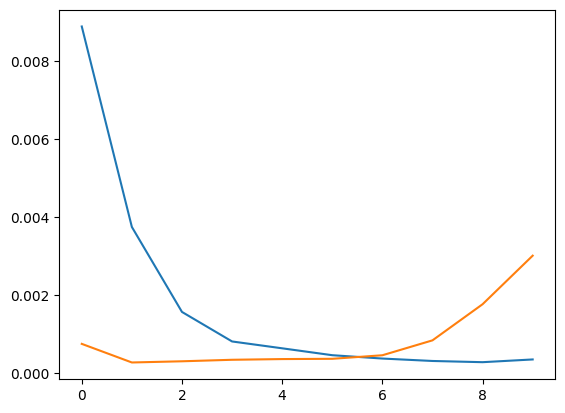

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [55]:
X_test_numeric = X_test_numeric.reshape(-1, lags, len(X_test_numeric[0]) // lags)
preds = model.predict([X_test_numeric, X_test_text])
preds = scaler.inverse_transform(preds)
preds[preds < 0 ]
preds[preds < 0] = 0

12/12 [==============================] - 2s 20ms/step


In [56]:
mean_squared_error(Y_test, preds), mean_absolute_error(Y_test, preds), r2_score(Y_test, preds)

(541924.730345322, 665.0238811728831, -0.6898469178867539)

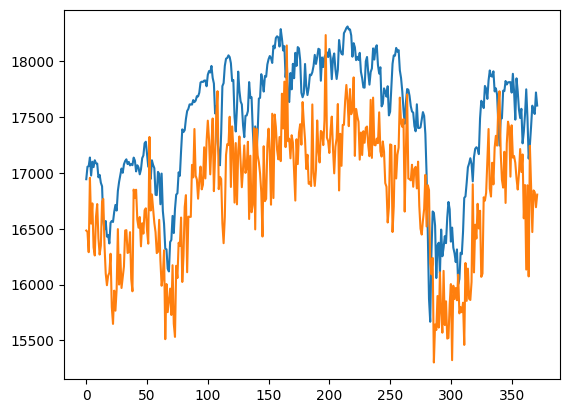

In [57]:
plt.plot(Y_test.values)
plt.plot(preds)
plt.show()

# LSTM Time Series

In [62]:
df2 = df

In [63]:
numeric_features = df2.columns[:-12]

In [64]:
df2 = df2[numeric_features]

In [65]:
df2

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...
2015-12-23,17427.630859,17607.919922,17427.630859,17602.609375,92820000,17602.609375
2015-12-24,17593.259766,17606.339844,17543.949219,17552.169922,40350000,17552.169922
2015-12-28,17535.660156,17536.900391,17437.339844,17528.269531,59770000,17528.269531


In [66]:
lags = 5

In [68]:
for i in range(1, lags+1):
  for col in numeric_features:
    df2[f'{col}_prev_{i}'] = df2[col].shift(i)

<ipython-input-68-d028f9b3287c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[f'{col}_prev_{i}'] = df2[col].shift(i)
<ipython-input-68-d028f9b3287c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[f'{col}_prev_{i}'] = df2[col].shift(i)
<ipython-input-68-d028f9b3287c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [70]:
df2 = df2.dropna(axis=0)

In [71]:
df2

,Open,High,Low,Close,Volume,Adj Close,Open_prev_1,High_prev_1,Low_prev_1,Close_prev_1,...,Low_prev_4,Close_prev_4,Volume_prev_4,Adj Close_prev_4,Open_prev_5,High_prev_5,Low_prev_5,Close_prev_5,Volume_prev_5,Adj Close_prev_5
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-15,11611.209961,11709.889648,11599.730469,11659.900391,215040000,11659.900391,11532.070312,11718.280273,11450.889648,11615.929688,...,11675.530273,11782.349609,183190000.0,11782.349609,11432.089844,11759.959961,11388.040039,11734.320312,212830000.0,11734.320312
2008-08-18,11659.650391,11690.429688,11434.120117,11479.389648,156290000,11479.389648,11611.209961,11709.889648,11599.730469,11659.900391,...,11601.519531,11642.469727,173590000.0,11642.469727,11729.669922,11867.110352,11675.530273,11782.349609,183190000.0,11782.349609
2008-08-19,11478.089844,11478.169922,11318.500000,11348.549805,171580000,11348.549805,11659.650391,11690.429688,11434.120117,11479.389648,...,11453.339844,11532.959961,182550000.0,11532.959961,11781.700195,11782.349609,11601.519531,11642.469727,173590000.0,11642.469727
2008-08-20,11345.940430,11454.150391,11290.580078,11417.429688,144880000,11417.429688,11478.089844,11478.169922,11318.500000,11348.549805,...,11450.889648,11615.929688,159790000.0,11615.929688,11632.809570,11633.780273,11453.339844,11532.959961,182550000.0,11532.959961
2008-08-21,11415.230469,11476.209961,11315.570312,11430.209961,130020000,11430.209961,11345.940430,11454.150391,11290.580078,11417.429688,...,11599.730469,11659.900391,215040000.0,11659.900391,11532.070312,11718.280273,11450.889648,11615.929688,159790000.0,11615.929688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-23,17427.630859,17607.919922,17427.630859,17602.609375,92820000,17602.609375,17253.550781,17451.109375,17242.859375,17417.269531,...,17493.500000,17495.839844,115780000.0,17495.839844,17530.849609,17784.359375,17483.679688,17749.089844,123790000.0,17749.089844
2015-12-24,17593.259766,17606.339844,17543.949219,17552.169922,40350000,17552.169922,17427.630859,17607.919922,17427.630859,17602.609375,...,17124.310547,17128.550781,344560000.0,17128.550781,17756.539062,17796.759766,17493.500000,17495.839844,115780000.0,17495.839844
2015-12-28,17535.660156,17536.900391,17437.339844,17528.269531,59770000,17528.269531,17593.259766,17606.339844,17543.949219,17552.169922,...,17116.730469,17251.619141,114910000.0,17251.619141,17495.039062,17496.580078,17124.310547,17128.550781,344560000.0,17128.550781


In [72]:
features = df2.columns[6:]

In [73]:
features

Index(['Open_prev_1', 'High_prev_1', 'Low_prev_1', 'Close_prev_1',
       'Volume_prev_1', 'Adj Close_prev_1', 'Open_prev_2', 'High_prev_2',
       'Low_prev_2', 'Close_prev_2', 'Volume_prev_2', 'Adj Close_prev_2',
       'Open_prev_3', 'High_prev_3', 'Low_prev_3', 'Close_prev_3',
       'Volume_prev_3', 'Adj Close_prev_3', 'Open_prev_4', 'High_prev_4',
       'Low_prev_4', 'Close_prev_4', 'Volume_prev_4', 'Adj Close_prev_4',
       'Open_prev_5', 'High_prev_5', 'Low_prev_5', 'Close_prev_5',
       'Volume_prev_5', 'Adj Close_prev_5'],
      dtype='object')

In [74]:
X, Y = df2[features], df2['Close']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [75]:
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
Y_train = scaler.fit_transform(Y_train.values.reshape(-1, 1))

In [77]:
X_train.shape

(1485, 30)

In [78]:
X_train = X_train.reshape(X_train.shape[0], lags, X_train.shape[1] // lags)
X_test = X_test.reshape(X_test.shape[0], lags, X_test.shape[1] // lags)

In [79]:
X_train.shape

(1485, 5, 6)

In [80]:
input_shape = (5, 6)

In [81]:
model = Sequential()
model.add(LSTM(100,  activation='relu', input_shape=input_shape, return_sequences=True))
model.add(LSTM(50,  activation='relu'))
model.add(Dense(1, activation='linear'))

In [82]:
model.compile(loss=keras.losses.MeanSquaredError() , optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError() ])

In [90]:
history = model.fit(X_train, Y_train, validation_split=0.2, batch_size=16, epochs=20,  shuffle=False)

Epoch 1/20
75/75 [==============================] - 2s 31ms/step - loss: 7.2582e-04 - mean_squared_error: 7.2582e-04 - mean_absolute_error: 0.0213 - val_loss: 3.6470e-04 - val_mean_squared_error: 3.6470e-04 - val_mean_absolute_error: 0.0152
Epoch 2/20
75/75 [==============================] - 1s 14ms/step - loss: 7.0796e-04 - mean_squared_error: 7.0796e-04 - mean_absolute_error: 0.0211 - val_loss: 3.1061e-04 - val_mean_squared_error: 3.1061e-04 - val_mean_absolute_error: 0.0139
Epoch 3/20
75/75 [==============================] - 1s 11ms/step - loss: 7.6975e-04 - mean_squared_error: 7.6975e-04 - mean_absolute_error: 0.0221 - val_loss: 2.5557e-04 - val_mean_squared_error: 2.5557e-04 - val_mean_absolute_error: 0.0124
Epoch 4/20
75/75 [==============================] - 1s 12ms/step - loss: 7.5646e-04 - mean_squared_error: 7.5646e-04 - mean_absolute_error: 0.0219 - val_loss: 2.2461e-04 - val_mean_squared_error: 2.2461e-04 - val_mean_absolute_error: 0.0117
Epoch 5/20
75/75 [==================

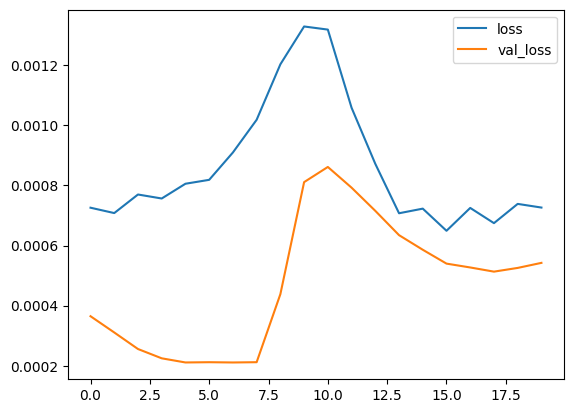

In [91]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

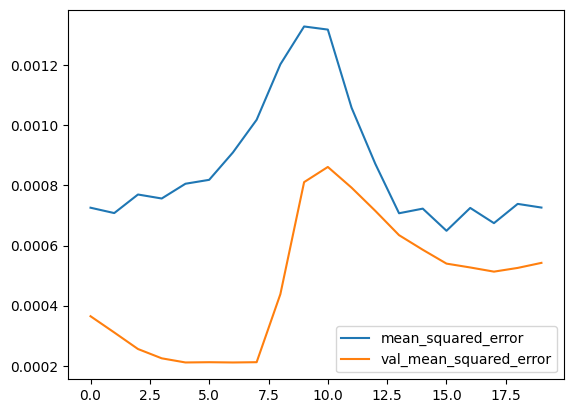

In [92]:
plt.plot(history.history['mean_squared_error'], label='mean_squared_error')
plt.plot(history.history['val_mean_squared_error'], label='val_mean_squared_error')
plt.legend()
plt.show()

In [93]:
preds = model.predict(X_test)

12/12 [==============================] - 0s 4ms/step


In [94]:
preds = scaler.inverse_transform(preds)

In [95]:
mean_squared_error(preds, Y_test), mean_absolute_error(preds, Y_test), r2_score(preds, Y_test)

(69972.85459067838, 197.55074973353507, 0.7715790841470673)

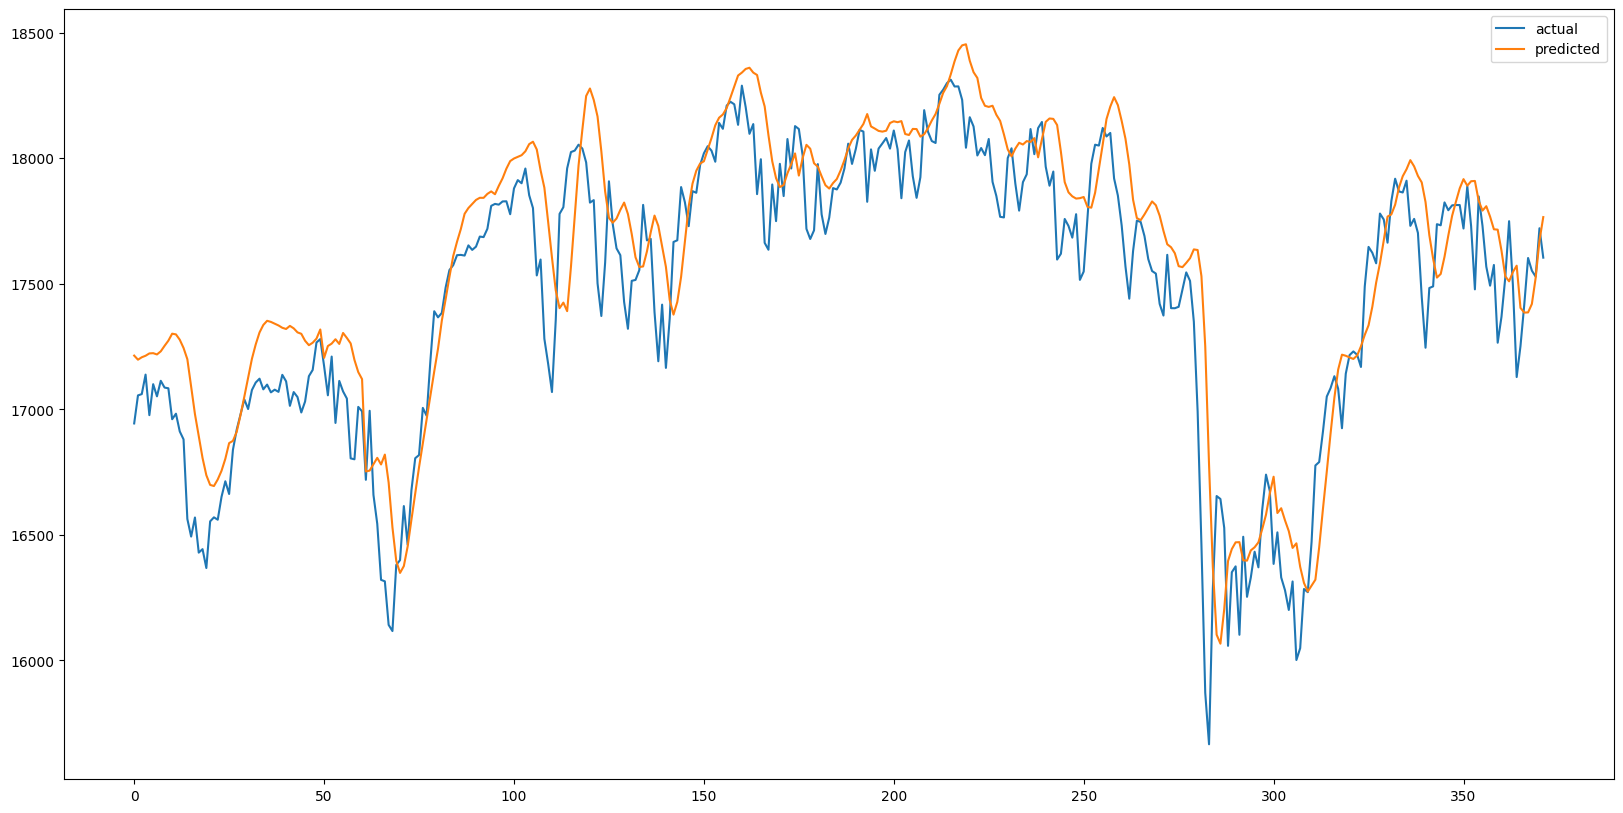

In [96]:
plt.figure(figsize=(20, 10))
plt.plot(Y_test.values, label='actual')
plt.plot(preds, label='predicted')
plt.legend()
plt.show()